<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Práctica 3 - Dynamic Programming </h2>
</center>
</p>
</div>

En esta sesión de programación dinámica veremos únicamente un algoritmo de procesamiento de imágenes. En este notebook se incluyen muchos conceptos que puede que os suenen extraños a día de hoy, sobretodo si no se ha visto tratamiento de imágenes. Independientemente, la única parte del algoritmo que se os pide impementar es aquella que contiene de forma explícita la programación dinámica, así que solo nos hace falta ver la imagen como una matriz de valores y de esta forma podremos trabajar con ella sin demasiado problema.

## 0 Conceptos esenciales

1. __Imágen__: Aunque existen diversas representaciones de una imagen a nivel informático, nosotros trabajaremos con la representación RGB, en la que una imagen de $m \times n$ pixeles se representa con una matriz de $m \times n \times 3$ (Una capa para Red, otra para Green y otra para Blue)
<img src="./img/rgb.png" width=50%>

2. __Gradiente de una imágen__: El gradiente de una imagen es, intuitivamente el valor puntual de la derivada de la imagen en un punto concreto. De forma mas sencilla, el gradiente de una imagen muestra cuanto de diferente es el valor de un pixel respecto a los elementos adyacentes. En una zona en la que el gradiente sea bajo se tratará de una zona homogenea, y una zona de gradiente alto suele indicar un borde.
<img src="./img/grad.png" width=50%>

## 1 Seam Carving
El algoritmo Seam Carving es un algoritmo que nos permite redimensionar imágenes teniendo en cuenta el contenido de la misma.

![Seam Carving](./img/seamcarving.jpg )

El método consite en lo siguiente, dada una imagen cualquiera:
![](./img/sc0.png)
1. Calcular el gradiente horizontal de la imágen en valor absoluto
![](./img/sc1.png)
2. Cómputo de todos los posibles caminos mínimos
![](./img/sc2.png)
3. Obtener el camino mínimo
![](./img/sc3.png)
4. Eliminar el camino mínimo
  

In [8]:
#matplotlib notebook
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd
from skimage import color, data, restoration
from seam_carving_util import rgb2gray, norm, top3, del_path, min_at, mark_path

### 1.1 Caminos mínimos

Para simplificar el ejercicio lo máximo posible los apartados 1 y 4 ya están implementados, en el 2 tendremos que crear una matriz del mismo tamaño de la imagen utilizando la siguiente formulación:

Sean $I$ la matriz con los gradientes de la imagen original y $D$ la imagen generada utilizando Dynamic Programming:

$D_{i,j} = I_{i,j}+\min\Big[D_{i-1, j-1},\quad D_{i-1, j},\quad D_{i-1,j+1}\Big]$

Intuitivamente, calculamos $D_{i,j}$ como la suma de $I_{i,j}$ y el valor mínimo de los tres elementos superiores.

0. Carga la imagen original


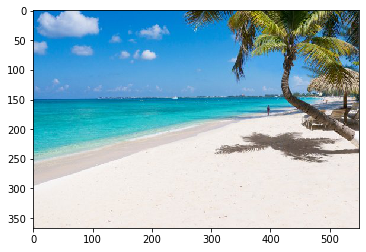

1. Calcula el gradiente horizontal de la imagen


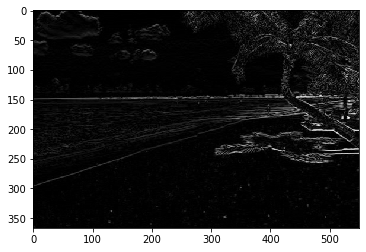

In [5]:
%matplotlib inline
## Carga la imagen en memoria
print("0. Carga la imagen original")
im = plt.imread('img/beach.jpg')/255.
plt.imshow(im)
plt.show()

## Aplica un filtro de Sobel para calcular el gradiente
print("1. Calcula el gradiente horizontal de la imagen")
dx = nd.sobel(rgb2gray(im), 0)
plt.imshow(np.abs(dx), cmap='gray')
plt.show()

In [41]:
def dynamic_programming(mat):
    """
    Se pueden utilizar las funciones importadas del archivo seam_carving_util.py que son:
    - top3: obtiene los tres elementos superiores (es decir, el valor de los 3 elementos superiores)
            de un punto (píxel) en la matriz
    - min_at: obtiene la posición del elemento mas pequeño de un array
    
    Tu código aquí
    """
    ret = np.array(mat) #Nuestra D en la formula, mat actuara de I
    
    for i in range(1,mat.shape[0]):
        for j in range(mat.shape[1]):
            ret[i][j] = mat[i][j] + min(top3(ret,[i,j])) #vamos incrementando el minimo de cada posicon
            
    return ret

def min_path_find(mat):
    path = [] #inicalizamos la lista para guardar el path
    Y = min_at(mat[mat.shape[0]-1])#buscamos el minimo de la ultima fila
    #path.append([len(mat),auxiliar])
    for i in range(mat.shape[0]-1): # haremos iteraciones hasta que i llegue a la dimension X-1
        lista3 = top3(mat,(mat.shape[0]-(i+1),Y)) #Cogemos los 3 elementos de arriba
        minimo = min(lista3) #Buscamos el minimo de estos 3
        path.append((len(mat)-i-1,Y)) #añadimos la posicion X y Y al path en forma de tupla
        if(len(lista3)==2): #Para saber si estamos en una esquina
            if((Y-1)<0):#Esquina izquiera
                if(lista3[0] == minimo):
                    continue
                else:
                    Y+=1
            else: #Esquina derecha
                if(lista3[0] == minimo):
                    Y-=1
                else:
                    continue
        else: #Los casos genericos
            if(lista3[0]==minimo):#Cuando la adyacencia esta a la izquiera
                 Y -= 1
            elif(lista3[1]==minimo):#Cuando es recto
                continue
            else: #Si no es ninguno sera la segunda posicion 
                Y += 1
    
    return path #retornamos el path

2. Calcula la matriz de programación dinámica
3. Busca el camino de mínimo cambio


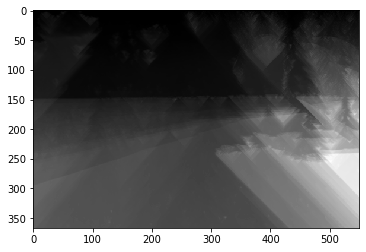

4. Elimina el camino de la imagen


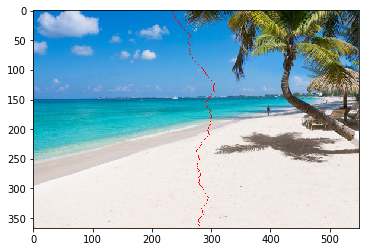

In [7]:
print("2. Calcula la matriz de programación dinámica")
tmp = dynamic_programming(np.abs(dx))
print("3. Busca el camino de mínimo cambio")
path = min_path_find(tmp)
plt.imshow(tmp, cmap='gray')
plt.show()

print("4. Elimina el camino de la imagen")
updated = del_path(im, path) # Updated es ahora la imagen original menos una columna (la eliminada por min_path)
# Muestra el camino eliminado sobre la imágen original
plt.imshow(mark_path(im, path))
plt.show()

COMPLEJIDAD ALGORITMO: la funcion implementada dynamic programing tiene una complejidad de NxM siendo que recorre toda la dimension de la fotografia, en cuanto al path serà de N siendo N el eje X que realizarà un backtracking hasta hacer un path

### 1.2 Eliminando zonas concretas de una imagen

Ahora suponed que, en lugar de eliminar el camino mínimo de una imagen queremos eliminar un elemento de la imagen sin que se note. Tomad como ejemplo las siguientes dos imágenes.

![](./img/agbar_a.png)
![](./img/agbar_b.jpg)

Alguna idea de como obtener este resultado?

<IPython.core.display.Javascript object>


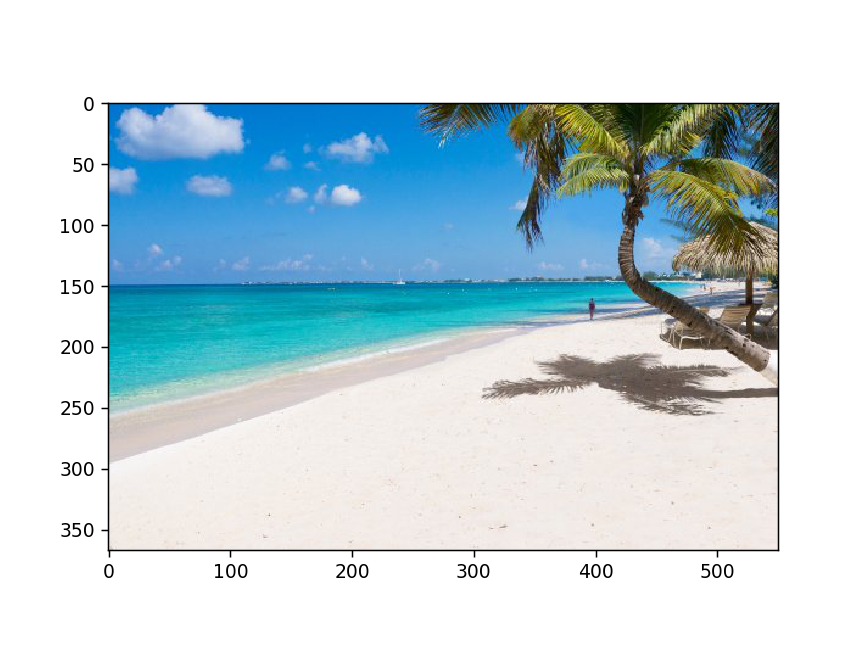

In [36]:
"""
Para que funcionen los siguientes bloques de código, es probable que tengáis que reiniciar el kernel.
Aquí obtenemos las coordenadas de una imagen obteniendo los clicks del usuario sobre esta.
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook

beach = plt.imread('./img/beach.jpg')/255.
coords = []

def onclick(event):
    print(event)
    global ix, iy
    ix, iy = event.xdata, event.ydata
    #print ('x = %d, y = %d'%(ix, iy))

    global coords
    coords.append((int(ix), int(iy)))
    
    if len(coords) == 2:
        fig.canvas.mpl_disconnect(cid)

    return coords


fig = plt.figure()
ax = fig.add_subplot(111)
plt.imshow(beach)
cid = fig.canvas.mpl_connect('button_press_event', onclick)

[(19, 20), (470, 326)]


<IPython.core.display.Javascript object>


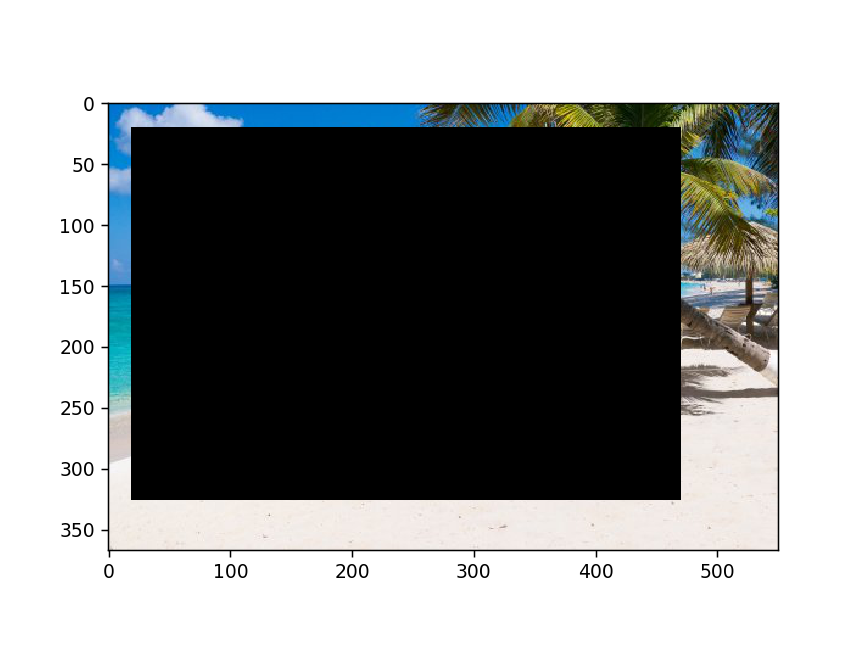

In [37]:
# Ahora le asignamos un peso a la imagen equivalente a -500000 en 
#  cada uno de los puntos de dentro del cuadrado mínimo
print(coords)

def remove_pixels(img, coords):
    img.setflags(write=1)
    coords = [(min(coords[0][0], coords[1][0]), min(coords[0][1], coords[1][1])), 
              (max(coords[0][0], coords[1][0]), max(coords[0][1], coords[1][1]))]
    if len(img.shape) == 2:
        # Cuadrado a negativo grande. Fuerza a los caminos a pasar por ahí.
        img[coords[0][1]:coords[1][1], coords[0][0]:coords[1][0]] = -500000
    else:
        # Cuadrado a 0. Lo ponemos a negro para el display
        img[coords[0][1]:coords[1][1], coords[0][0]:coords[1][0], :] = 0 

    return img

new = remove_pixels(beach, coords)
plt.figure()
plt.imshow(new)

In [45]:
"""
Implementa las modificaciones necesarias para conseguir eliminar una zona concreta de la imagen.
"""
def removePatch(img, coords):
    
    updated = img.copy() #Como reusaremos la una variable que contenga la imagen modificada le guardamos la original
    #Declaracion de cordenadas para facilitar lectura
    print(coords)
    x1 = coords[0][0] 
    x2 = coords[1][0]
    y2 = coords[1][1]
    #Aplicamos el sobel para calcular los gradientes y los ponemos a absoluto
    dx = nd.sobel(rgb2gray(updated), 0)
    dx = np.abs(dx)
    #ponemos en valores negativos los valores que queremos eliminar
    remove_pixels(dx, coords)
    print(x2-x1)
    for iteraciones in range(abs(x2-x1)): #Iteraremos el proceso x2-x1 veces que seran todas para eliminar los paths minimos
        #Aplicamos los pasos del algoritmo Seam Carving para encontrar el path minimo 
        tmp = dynamic_programming(dx)
        path = min_path_find(tmp)
        updated = del_path(updated, path) 
        print(iteraciones) #Contador para saber cuanto le queda
        dx = nd.sobel(rgb2gray(updated), 0) #Hay que volver a calcular los gradientes para actualizar sus valores
        dx = np.abs(dx) #Hacemos absoluto para que no hayan negativos en los calculos
        coords[1] = (x2 - 1, y2) #actualizamos las coordenadas a eliminar para que sean las mismas que se introdujeron
        remove_pixels(dx, coords)#rehacemos el volver los valores de pixeles que queremos a negativos
    
    return updated


<IPython.core.display.Javascript object>


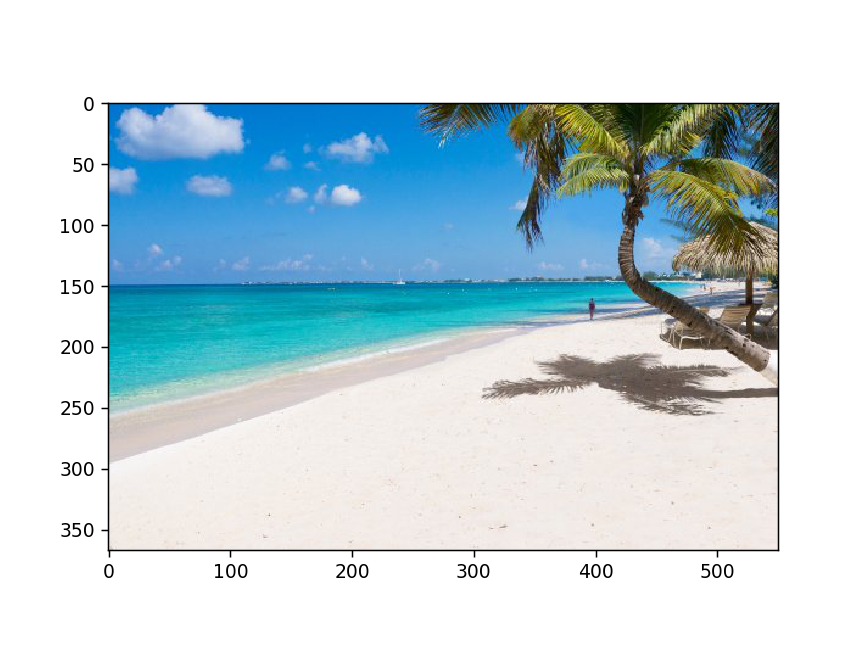

[(19, 20), (467, 326)]
448
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270

<IPython.core.display.Javascript object>


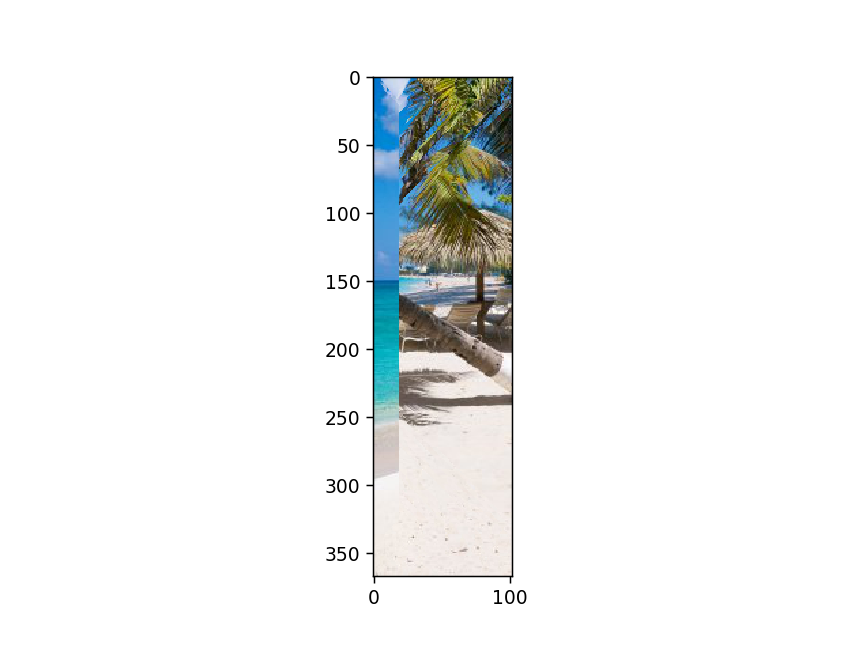

In [46]:
# Original image
img = plt.imread('./img/beach.jpg')/255.
plt.figure()
plt.imshow(img)
plt.show()

# Remove patch defined by 'coords'
new = removePatch(img, coords)

# Show modified image
plt.figure()
plt.imshow(new)
plt.show()

COMPLEJIDAD:La complejidad de este algoritmo es de k por el propio de Seam Carving, siendo k el numero de paths a eliminar 
    que se sabrà con la amplitud del trozo a eliminar

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>
<p>
La entrega de esta práctica se podrá realizar en el campus virtual hasta el día <b>8 de Diciembre a las 23:55</b>. En la tarea que se habilitará en el campus deberéis colgar <b>únicamente este notebook</b> con el nombre:
</p>
<p>
```
[grupo]_[apellido]_[nombre]_3-PD.ipynb
```

</p>
<p>
    Por ejemplo, para un alumno llamado <i>Nombre Genérico</i> perteneciente al <i>grupo Z</i> el nombre del archivo debería ser:
</p>
<p>
```
Z_Generico_Nombre_3-PD.ipynb
```

Y <b>NO</b>:
<ul>
<li>Z00_Generico_Nombre_3-PD.zip</li>
    
<li>ZX_Generico_Nombre_3-PD.ipynb</li>

<li>Lab2_Generico_Nombre_3-PD.rar</li>

<li>3-PD.ipynb</li>
<li> ... literalmente cualquier otra cosa que no sea el nombre que sí hay que ponerle </li>
</ul>
</p>
<p>


Es fundamental que el código esté bién comentado y con un análisis de complejidad exhaustivo del algoritmo. La importancia de poner nombre correcto al archivo debería ser directamente proporcional a lo contentos que queráis que los profesores de prácticas corrijan.<b> No adherirse al formato en el nombre del archivo así como entregar otro tipo de archivo o varios archivos, conllevará a la no corrección de vuestra práctica.</b>
</p>
</div>